# AI - CA1

#### Mahya Shahshahani - ID:810199598

## Curve Fitting using Genetic Algorithm
In this copmuter assignment, based on the given points for curve fitting, we have determined the coefficients as a polynomial equation.

### Defining Basic Concepts
In a genetic algorithm, a solution is represented as a chromosome, which is typically a string of genes. In the context of curve fitting, a chromosome represents a set of parameters for the model we want to fit. Each gene within the chromosome corresponds to a specific parameter.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import random

In [2]:
class Chromosome:
    def __init__(self, degree, coefficient_range):
        self.degree = degree
        self.coefficient_range = coefficient_range
        self.coefficients = []
        self.fitness = None

        
    def initialize(self):
        # Initialize the coefficients randomly within the specified range
        # Each coefficient represents a parameter value for the polynomial function
    
        self.coefficients = [random.randint(self.coefficient_range[0], self.coefficient_range[1])
                     for _ in range(self.degree + 1)]
        
        
    def evaluate_fitness(self, fitness_function, points):
        # Evaluate the fitness of the chromosome using the fitness function
        # The fitness function calculates the fitness based on the model parameters and the given points
        self.fitness = fitness_function(self.coefficients, points)

        ##checked
        
                
    def mutate(self, mutation_rate):
        # Mutate the coefficients of the chromosome with a certain probability (mutation_rate)
        for i in range(len(self.coefficients)):
            if random.random() < mutation_rate:

                mutation = random.randint(self.coefficient_range[0], self.coefficient_range[1])
                self.coefficients[i] += mutation
                
                self.coefficients[i] = max(self.coefficients[i], self.coefficient_range[0])
                self.coefficients[i] = min(self.coefficients[i], self.coefficient_range[1])
   
    
    def crossover(self, other_chromosome, crossover_rate):
    # Perform crossover with another chromosome to create offsprings, it is done with a probability(crossover_rate)

        if random.random() < crossover_rate:
            crossover_point = random.randint(0, self.degree)
            offspring1 = Chromosome(self.degree, self.coefficient_range)
            offspring2 = Chromosome(self.degree, self.coefficient_range)
            offspring1.coefficients = self.coefficients[:crossover_point] + other_chromosome.coefficients[crossover_point:]
            offspring2.coefficients = other_chromosome.coefficients[:crossover_point] + self.coefficients[crossover_point:]

            return offspring1, offspring2
    
        return self, other_chromosome

##  Population
A population is a collection of chromosomes. Initially, a population is randomly generated, and each chromosome represents a potential solution to the curve fitting problem.

In [68]:
def generate_initial_population(population_size, degree, coefficient_range):
    # Generate an initial population of chromosomes with random coefficients
    population = []
    for _ in range(population_size):
        chromosome = Chromosome(degree, coefficient_range)
        chromosome.initialize()
        population.append(chromosome)
    return population

##  Fitness Function

The fitness function determines how near the equation is to the target value.It will return a measure of how well each chromosome (solution) in the population fits the given data points.
Using MSE as a fitness function in curve fitting typically involves an optimization process to find the best-fit parameters for a given model.
In our case, lower MSE values indicate better fitness, meaning that the chromosome produces predictions closer to the actual target values.

$$fitness = MSE = \frac{\sum \limits _{i=1} ^{n} (X_{i} - \hat{X}_{i})^2}{n}$$


In [69]:
def mse_fitness(coefficients, points):
    # Calculate the predicted values of the target variable using the polynomial defined by the coefficients
    predicted_values = [sum(coefficient * (x ** power) for power, coefficient in enumerate(coefficients))
                        for x, _ in points]

    mse = sum((predicted - actual) ** 2 for predicted, (_, actual) in zip(predicted_values, points)) / len(points)

    return mse

## Create a new generation and a genetic algorithm



In [88]:
population_size = 100
degree = 3
coefficient_range = (-10, 10)
crossover_rate = 0.8
mutation_rate = 0.1
points = [(0,1), (1,0), (2, -5), (-1, -8)]
num_generations = 100

In [105]:
# Step 1: Generate initial population
population = generate_initial_population(population_size, degree, coefficient_range)


for generation in range(num_generations):
    # Step 2: Calculate fitness
    for chromosome in population:
        chromosome.evaluate_fitness(mse_fitness, points)
        

    # Sort the population based on fitness
    population.sort(key=lambda x: x.fitness)


    # Step 3: Ranked-based selection
    population_size = len(population)
    population_rank = sorted(range(population_size), key=lambda x: population[x].fitness)
    probabilities = [((2 * (population_size - i)) / (population_size * (population_size + 1))) for i in range(population_size)]
    cumulative_probabilities = [sum(probabilities[:i + 1]) for i in range(len(population))]
    
    mating_pool = []
    for _ in range(population_size):
        rand_num = random.random()
        for i, cum_prob in enumerate(cumulative_probabilities):
            if rand_num <= cum_prob:
                mating_pool.append(population[population_rank[i]])
                break

    # Step 4: Shuffle the mating pool
    random.shuffle(mating_pool)

    offspring_chromosomes = []
    # Step 5: For each consecutive pair, apply crossover and mutation
    for i in range(0, len(mating_pool), 2):
        parent1 = mating_pool[i]
        parent2 = mating_pool[i + 1]
        
        offspring1, offspring2 = parent1.crossover(parent2, crossover_rate)

        offspring1.mutate(mutation_rate)
        offspring2.mutate(mutation_rate)

        offspring_chromosomes.extend([offspring1, offspring2])

    # Step 6: Replace the whole population with the offsprings made
    population = offspring_chromosomes
    
# Final evaluation of fitness after the last generation
    for chromosome in population:
        chromosome.evaluate_fitness(mse_fitness, points)

    #Sort the final population based on fitness
    population.sort(key=lambda x: x.fitness)
    
    #The best solution
    best_solution = population[0]
    best_fitness = best_solution.fitness
    best_coefficients = best_solution.coefficients


In [106]:

# Print the best solution
print("Best Solution:")
print("Fitness:", best_fitness)
print("Coefficients:", best_coefficients)

Best Solution:
Fitness: 0.0
Coefficients: [1, 3, -5, 1]


## Plot

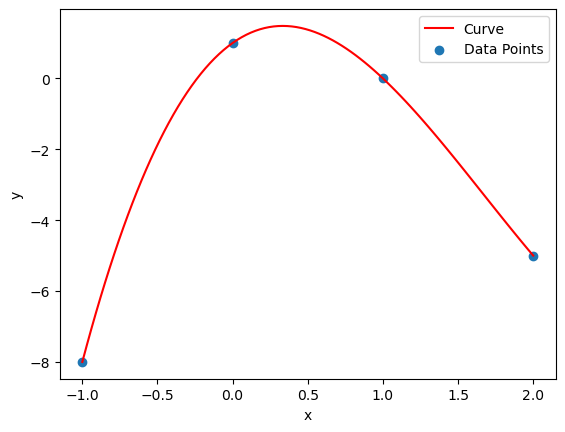

In [107]:
coefficients = best_coefficients
x_values = np.linspace(min(x for x, _ in points), max(x for x, _ in points), 100)
y_values = np.polyval(coefficients[::-1], x_values)

# Plot the original data points
plt.scatter([x for x, _ in points], [y for _, y in points], label='Data Points')

# Plot the curve
plt.plot(x_values, y_values, color='red', label='Curve')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

# Questions:


1. If the population is small, it may lack the necessary diversity of candidate soloutions and my not find the optimal one. Better solutions may be available.<br>If the population is large, it may cause computational complexity and would be time-consuming. 

2. **Accuracy**: Generally, increasing the population size can improve the accuray of the algorithm cause the exploration will be done in a wider space and will have a potential to discover better-fitting curves.<br> **Speed**: Because of the mentioned reason(wider exploration), the algorithm requires more time to do the fitness evalution, selection, crossover & mutation.


3. **Mutation**: It will introduces random changes to the chromosomes, promoting exploration of the solution space.<br> **Crossover**: It involves combining genetic information from parent chromosomes to create offspring. It helps the algorithm's ability to converge faster and more efficiently.<br> **What if we only use one?** <br> Well, they complete each other. Mutation maintains diversity and exploration, while crossover enhances exploitation and convergence. If we just use mutation the algorithm may struggle to converge to optimal solutions. Cause it relies on random changes without using the information shared by the population. If we only apply crossover, the algorithm may converge quickly towards local optima and lack the necessary exploration to escape those optima.

4. I think one if we start with a known good solution and make our initial generation with it, number of generations needed to find optimal will be reduced. Optimizing the crossover and mutation rates can impact the algorithm's performance, too.


5. Even with those strategies mentioned earlier, it is possible for chromosomes to remain unchanged after several iterations. This phenomenon is known as *stagnation* or *premature convergence*. Reasons this might happen:<br>1. **Lack of Sufficient Diversity**: Stagnation can happen if the population lacks diversity, meaning that the individuals are too similar to each other. <br> 2. **Insufficient Exploration**: If the algorithm focuses too heavily on exploitation, it may ignore exploration of other regions of the solution space. <br> 3. **Inappropriate Selection**:Too high or too low selection pressures might cause problems. If the selection pressure is too high, the algorithm may only focus on the fittest individuals, which limits the exploration of different solutions and can lead to getting stuck. If the selection pressure is too low, progress may be slow or nonexistent because the algorithm doesn't prioritize the best individuals enough. 
<br><br>Finding the right balance is crucial for the algorithm to work effectively and make progress to find the best solution.
Restart or Reinitialization or using different Selection Mechanisms might help.

6. Well, in this case we can limit the number of generations, use a threshold for fitness or use a time limit.

7. I think because we are doing a the larger search, and the algorithm will have more computational complexity, the time to find right coefficients will increase. It will lead to longer computation times, too. Additionally, Using  higher-degree polynomials will be more flexibale but we should be careful about overfitting.

8. With more data points, the computational time will be increased. And probably the algorithm will take more iterations to converge to an optimal solution. But fewer data points increase the risk of overfitting, while more data points help the algorithm to generalize better.
